In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re 
import matplotlib.font_manager as fm


import spacy
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import DBSCAN

In [14]:
file_path = 'chat_records.xlsx'
df = pd.read_excel(file_path)

Number of chats:  176
[4, 2, 8, 4, 2, 2, 4, 4, 14, 2, 6, 4, 6, 30, 6, 26, 2, 2, 8, 12, 2, 16, 2, 4, 62, 10, 10, 20, 2, 2, 4, 8, 2, 4, 2, 2, 80, 48, 14, 10, 36, 2, 18, 8, 42, 4, 10, 68, 2, 4, 12, 28, 12, 16, 16, 6, 46, 30, 4, 4, 4, 14, 30, 2, 8, 20, 38, 52, 10, 42, 4, 18, 14, 36, 8, 16, 12, 4, 14, 2, 2, 28, 68, 12, 12, 10, 46, 56, 42, 24, 128, 6, 72, 4, 12, 2, 30, 30, 64, 14, 42, 26, 10, 70, 28, 10, 14, 10, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 6, 2, 4, 2, 2, 2, 2, 2, 2, 14, 22, 2, 2, 12, 6, 22, 42, 66, 2, 22, 10, 18, 60, 18, 6, 10, 4, 4, 2, 24, 16, 22, 12, 28, 110, 2, 72, 48, 6, 32, 10, 42, 2, 18, 38, 72, 28, 6, 10, 10, 14, 2, 20, 20, 18, 30, 36, 48]


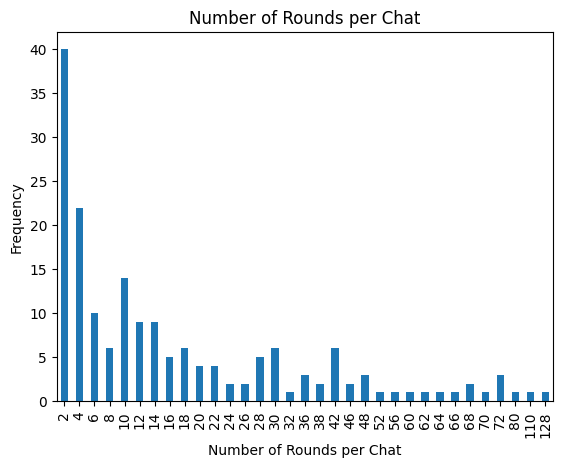

In [15]:
# chat_id
chat_id = df.iloc[:, 0]
unique_chat_id = chat_id.unique()
print('Number of chats: ', len(unique_chat_id))

# number of rounds per chat
rounds_per_chat = []
for cid in unique_chat_id:
    msgs = df[df['chat_id'] == cid]
    # print(msgs['round_id'])
    rounds_per_chat.append(len(msgs))

print(rounds_per_chat)
rounds_per_chat_series = pd.Series(rounds_per_chat)
frequency = rounds_per_chat_series.value_counts().sort_index()

frequency.plot(kind='bar')
plt.xlabel('Number of Rounds per Chat')
plt.ylabel('Frequency')
plt.title('Number of Rounds per Chat')
plt.show()


如何 对 空值 进行 填充
如何 对 类别 变量 进行 离散 化 呢
nuxtjs 中 如何 禁用 服务端 渲染
如何 读取 excel 文件
如何 读取 excel 文件
如下 的 R 代码执行 报错 是 什么 原因
如何 选择 合适 的 机器 学习 模型
如何 读取 excel 文件
python 里面 怎么 判断 一个 字符串 是 浮点数
pandas dataframe 如何 按照 某列 的 值 进行 筛选
pandas dataframe 如何 按照 某列 的 值 进行 筛选
如何 读取 excel 文件
如何 读取 excel 文件
如何 对 空值 进行 填充
如何 在 R
如何 在 R 语言 中 提取 数据
R
1 使用 R 读取 aline data csv 并 命名 为 df aline 2 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数 3 将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los day 降序 在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来 4 新增 一个 变量 例如 对 年龄 进行 分组 至少 3 组 并 命名 为 age group 5 不 需要 R 代码 请 简要 解释 为什么 length df aline age 与 length df aline 的 输出 结果 不 相同 6 使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述 例如 比较 有 动脉 导管 留置 的 男性 与 有 动脉 导管 留置 的 女性 的 住院 时 长 分布
r 语言 中
r 语言 中 melt 函数 是 什么 意思
python 怎么 读取数据
r 语言 中 acast 函数 是 什么 意思
SVM 的 软 间隔 怎么 理解
如何 定义 函数
数学 推导 你 展示 一下
如何 从 CSV 文件 读取数据 框
如何 打开 文件
练习 元素 访问 要求 熟练掌握 通过 标号 访问 向量 矩阵 数组 列表 的 具体 元素 这是 啥意思 要 怎么 练习
如何 从 csv 文件 中 读取数据 框

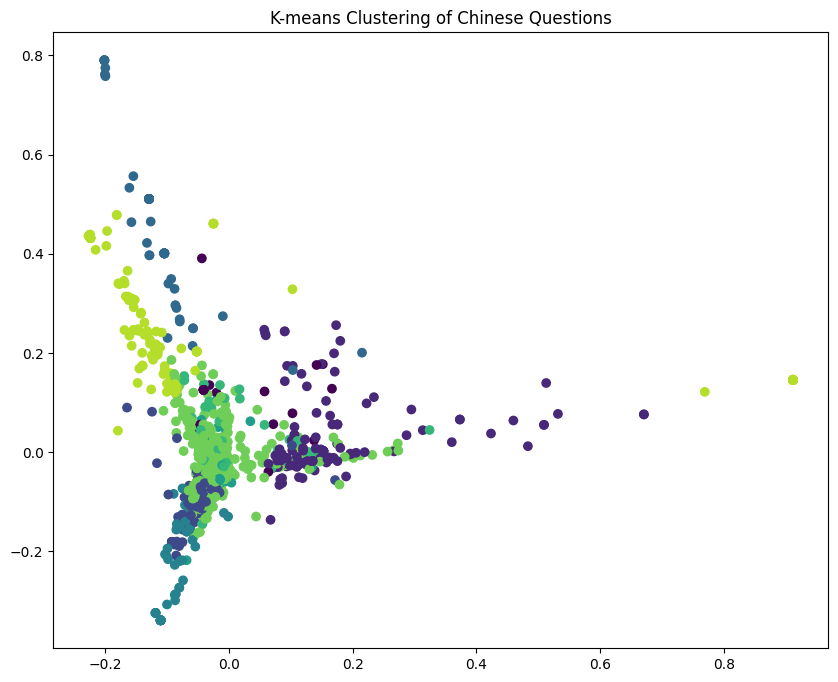

In [16]:
user_qs = df[df['role'] == 'user']['message_content'].dropna()
# print(user_qs)

def tokenize_mixed_content(text):
    tokens = jieba.cut(text, cut_all=False)
    cleaned_tokens = []
    for token in tokens:
        # Remove special characters and extra spaces
        token = token.replace('$', '')
        token = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', token)
        
        if token.strip():
            cleaned_tokens.append(token.strip())
    print(" ".join(cleaned_tokens))
    return " ".join(cleaned_tokens)

# Preprocessing: Tokenize Chinese text using jieba
# Error in file(file, "rt") : cannot open the connection In addition: Warning message: In file(file, "rt") :   cannot open file 'C:\Users\XH\Desktop\医学数据挖掘\data\aline_data': No such file or directory

tokenized_questions = [tokenize_mixed_content(question) for question in user_qs]
# print(tokenized_questions)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tokenized_questions)

def elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
# elbow_method(X) # 9 is the point

# Apply K-means clustering
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_questions = pd.DataFrame({'question': tokenized_questions, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_questions = clustered_questions[clustered_questions['cluster'] == cluster_num]['question']
    for question in cluster_questions:
        print(f" - {question}")


# print(clustered_questions)
# Identify common terms in each cluster
def get_top_terms(cluster_num, vectorizer, X, labels, top_n=5):
    # Get indices of documents in the current cluster
    cluster_indices = np.where(labels == cluster_num)[0]
    # Compute the average TF-IDF score for each term in the cluster
    cluster_tfidf = X[cluster_indices].mean(axis=0)
    cluster_tfidf = np.asarray(cluster_tfidf).flatten()
    # Get terms and their TF-IDF scores
    terms = vectorizer.get_feature_names_out()
    term_scores = [(terms[i], cluster_tfidf[i]) for i in range(len(terms))]
    # Sort terms by score in descending order and return top_n terms
    top_terms = sorted(term_scores, key=lambda x: x[1], reverse=True)[:top_n]
    return top_terms

for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# Visualize the clustering using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

# colors = ["r", "b", "g", "c", "m", "purple", ""]

# Use a colormap
colormap = plt.get_cmap('viridis', 10)  # 'viridis' colormap with 10 discrete colors
colors = [colormap(i) for i in range(10)]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(10, 8))

# ax.scatter(x_axis, y_axis, c=[colors[d] for d in labels])
ax.scatter(x_axis, y_axis, c=[colors[d] for d in labels])

# Truncate long text labels for display
def truncate_text(text, max_length=0):
    return text if len(text) <= max_length else text[:max_length] + '...'

# Set up a Chinese font
chinese_font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # Update this path
chinese_font = fm.FontProperties(fname=chinese_font_path)
for i, question in enumerate(tokenized_questions):
    ax.text(x_axis[i], y_axis[i], '', fontsize=9, fontproperties=chinese_font)

plt.title('K-means Clustering of Chinese Questions')
plt.show()

In [17]:
# Identify follow-up questions and new questions

# Load spaCy model for Chinese
nlp_zh = spacy.load('zh_core_web_sm')

# Load BERT Multilingual model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Function to get BERT embeddings for a given text
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

# Function to cluster questions using DBSCAN
def cluster_questions(chat_history):
    print(chat_history)
    embeddings = np.array([get_embedding(q) for q in chat_history])
    clustering = DBSCAN(eps=0.5, min_samples=2, metric='cosine').fit(embeddings)
    return clustering.labels_

# Function to analyze chat history of a session using clustering to count follow-up questions
def analyze_chat_session(chat_history):
    labels = cluster_questions(chat_history)
    follow_up_count = sum(1 for i in range(1, len(labels)) if labels[i] == labels[i-1] and labels[i] != -1)
    new_count = len(chat_history) - follow_up_count
    return follow_up_count, new_count

# Function to analyze all sessions in a chat log
def analyze_chat_log(chat_log):
    session_results = []
    for session_chat_history in chat_log:
        follow_up_count, new_count = analyze_chat_session(session_chat_history)
        session_results.append((follow_up_count, new_count))
    return session_results

# Example chat log containing multiple chat sessions
# chat_log = [
#     [
#         "如何在虚拟环境中更改Python版本?",
#         "更改Python版本后如何激活虚拟环境?",
#         "你能给我一个例子吗?",
#         "这样可以吗?",
#         "虚拟环境的用途是什么?",
#     ],
#     [
#         "如何开始一个新的项目?",
#         "项目的结构应该是怎样的?",
#         "如何安装必要的依赖?",
#         "如何部署项目?",
#     ],
# ]

# unique_chat_id
# msgs_per_session = []
# for cid in unique_chat_id:
#     msgs = df[(df['chat_id'] == cid) & (df['role'] == 'user')]['message_content'].dropna()
#     # print(msgs.tolist())
#     msgs_per_session.append(msgs.tolist())
    


In [18]:
# unique_chat_id
msgs_per_session = []
for cid in unique_chat_id:
    msgs = df[(df['chat_id'] == cid) & (df['role'] == 'user')]['message_content'].dropna()
    # print(msgs.tolist())
    msgs_per_session.append(msgs.tolist())
    
# Analyze chat log to count follow-up and new questions for each session
session_results = analyze_chat_log(msgs_per_session)

# Output results
for i, (follow_up_count, new_count) in enumerate(session_results, start=1):
    print(f"Session {i}: Follow-up questions: {follow_up_count}, New questions: {new_count}")

['如何对空值进行填充', '如何对类别变量进行离散化呢']
['nuxtjs中如何禁用服务端渲染']
['如何读取excel文件', 'python里面怎么判断一个字符串是浮点数', 'pandas dataframe如何按照某列的值进行筛选', 'pandas dataframe如何按照某列的值进行筛选']
['如何读取excel文件', '如下的R代码执行报错是什么原因']
['如何选择合适的机器学习模型']
['如何读取excel文件']
['如何读取excel文件', '如何打开文件']
['如何读取excel文件', '如何对空值进行填充']
['如何在R', '如何在R语言中提取数据', 'R', 'r语言中', 'r语言中 melt 函数是什么意思', 'r语言中 acast 函数是什么意思', 'r中str函数是什么']
['1. 使用 R 读取 aline_data.csv，并命名为 df_aline。 *2. 删除所有含有缺失值的观测记录，并计算剩余的观测纪录数和变量数。 *3. 将上述步骤得到的数据集依次进行如下排序：是否植入动脉导管（aline_flag） 升序、在住院期间是否死亡（hosp_exp_flag）升序、住院时长（hospital_los_day） 降序。在该排序规则下，提取第 60 个观测记录的住院时长并打印出来。 4. 新增一个变量，例如，对年龄进行分组（至少 3 组）并命名为 age_group。 *5. （不需要 R 代码）请简要解释为什么 length(df_aline$age)与 length(df_aline)的 输出结果不相同。 *6. 使用 ggplot2，选择恰当的图形进行数据可视化并描述，例如，比较有动脉导管 留置的男性与有动脉导管留置的女性的住院时长分布。']
['python怎么读取数据', 'SVM的软间隔怎么理解', '数学推导你展示一下']
['如何定义函数', '如果有多个返回值呢']
['如何从CSV文件读取数据框', '报错Error: \'\\U\' used without hex digits in character string starting ""C:\\U"是为什么', 'Error in file(file, "rt") : cannot open the connecti

[(1, 1), (0, 1), (3, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (6, 1), (0, 1), (2, 1), (1, 1), (2, 1), (14, 1), (1, 1), (11, 1), (0, 1), (0, 1), (3, 1), (4, 1), (0, 1), (6, 2), (0, 1), (1, 1), (30, 1), (4, 1), (4, 1), (9, 1), (0, 1), (0, 1), (1, 1), (1, 3), (0, 1), (1, 1), (0, 1), (0, 1), (37, 3), (23, 1), (6, 1), (4, 1), (14, 3), (0, 1), (8, 1), (3, 1), (20, 1), (1, 1), (1, 4), (28, 3), (0, 1), (0, 2), (4, 2), (13, 1), (5, 1), (3, 5), (7, 1), (2, 1), (22, 1), (13, 1), (0, 2), (1, 1), (0, 2), (6, 1), (14, 1), (0, 1), (0, 4), (9, 1), (16, 3), (23, 3), (4, 1), (17, 4), (1, 1), (8, 1), (4, 3), (15, 3), (2, 2), (5, 3), (5, 1), (0, 2), (6, 1), (0, 1), (0, 1), (13, 1), (33, 1), (5, 1), (5, 1), (3, 2), (22, 1), (27, 1), (18, 3), (10, 2), (63, 1), (2, 1), (35, 1), (1, 1), (5, 1), (0, 1), (14, 1), (14, 1), (25, 6), (2, 5), (19, 1), (11, 2), (2, 3), (32, 3), (10, 3), (4, 1), (6, 1), (4, 1), (0, 1), (0, 2), (0, 1), (0, 1), (0, 1), (0, 2), (1, 1), (0, 1), (0, 1), (0, 1), (2, 1), (0, 1), (1, 1), 

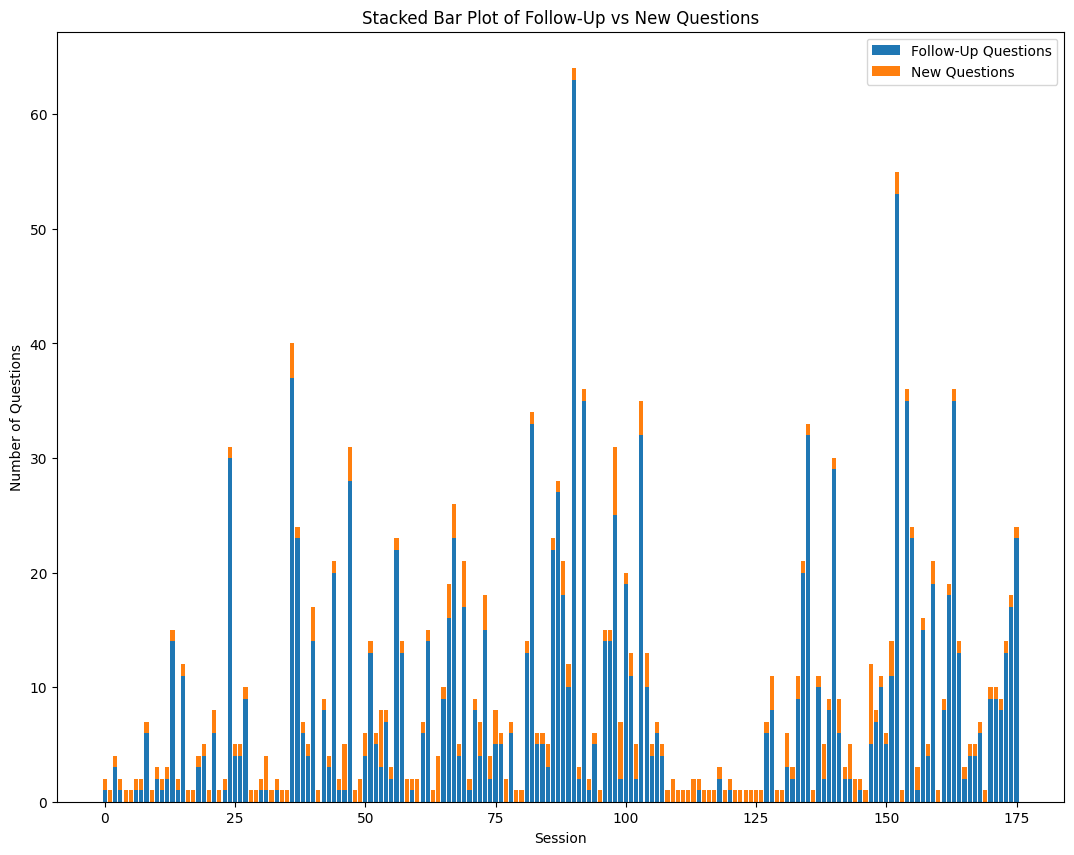

In [19]:
# session_results [(# followup, # new)]
# data = [(3, 5), (7, 2), (6, 8), (4, 3)]
print(session_results)
# Unzip the data into two lists
values1, values2 = zip(*session_results)

# Define the x locations for the groups
# ind = np.arange(len(session_results))

# Define the width of the bars
# width = 0.35

# Create the plot
# fig, ax = plt.subplots()

# Plot the first set of bars
# rects1 = ax.bar(ind - width/2, values1, width, label='Value 1')

# Plot the second set of bars
# rects2 = ax.bar(ind + width/2, values2, width, label='Value 2')

# Add some text for labels, title, and axes ticks
# ax.set_xlabel('Tuples')
# ax.set_ylabel('Values')
# ax.set_title('Bar plot of tuple values')
# ax.set_xticks(ind)
# ax.set_xticklabels([f'Tuple {i+1}' for i in range(len(data))])
# ax.legend()

# Display the plot
# plt.show()
data_array = np.array(session_results)
# Create a stacked bar plot
plt.figure(figsize=(13, 10))
plt.bar(np.arange(len(session_results)), data_array[:, 0], label='Follow-Up Questions')
plt.bar(np.arange(len(session_results)), data_array[:, 1], bottom=data_array[:, 0], label='New Questions')
plt.xlabel('Session')
plt.ylabel('Number of Questions')
plt.title('Stacked Bar Plot of Follow-Up vs New Questions')
plt.legend()
plt.show()

